In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
def Show_me_image(img, name_of_window):
    #cv2.namedWindow(name_of_window, cv2.WINDOW_NORMAL)
    cv2.imshow(name_of_window, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [2]:
img = cv2.imread("./vaahXGdRxhg.jpg")
Show_me_image(img, "original")

In [3]:
def Show_me_here (img1,img2):
    plt.subplot(121),plt.imshow(img1[:,:,::-1],aspect='auto'),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img2[:,:,::-1],aspect='auto'),plt.title('Edited')
    plt.xticks([]), plt.yticks([])

# 1. Averaging

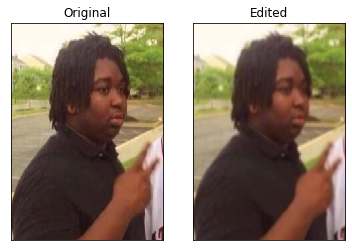

In [4]:
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
Show_me_here(img,dst)


# 2. Gaussian Blurring

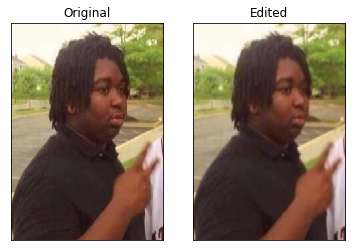

In [5]:
gauss = cv2.GaussianBlur(img,(5,5),0)
Show_me_here(img,gauss)

# 3. Median Blurring

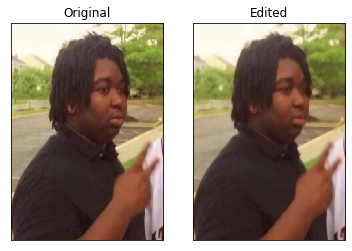

In [6]:
median = cv2.medianBlur(img,5)
Show_me_here(img,median)

# 4. Bilateral Filtering

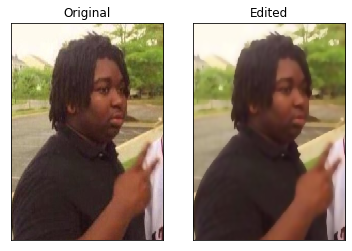

In [7]:
blur = cv2.bilateralFilter(img,9,75,75)
Show_me_here(img,blur)

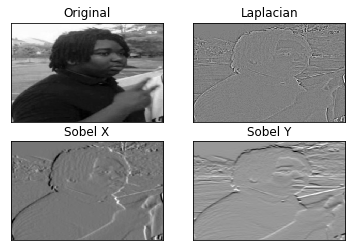

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# remove noise
image = cv2.GaussianBlur(gray,(3,3),0)

# convolute with proper kernels
laplacian = cv2.Laplacian(image,cv2.CV_64F)
sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)  # y

plt.subplot(2,2,1),plt.imshow(image,cmap = 'gray',aspect='auto')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray',aspect='auto')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray',aspect='auto')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray',aspect='auto')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()